# Questão 1:

Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as
funções abaixo.

a. $f(x) = \sin(2x) + \cos(3x)$, onde $0 \leq x \leq 5$

b. $f(x) = 10x^5 + 5x^4 + 2x^3 - 0{,}5x^2 + 3x + 2$, onde $0 \leq x \leq 5$

Para cada função a ser aproximada, gere um conjunto de treinamento e um conjunto de testes.
Nesses conjuntos, cada amostra deve ser representada da seguinte forma: x é a entrada e f(x)
é a saída desejada - rótulo. Treine um perceptron de múltiplas camadas para que ele aprenda a
aproximar a função a partir do conjunto de treinamento, e vá testando com o conjunto de
validação.

Apresente os gráficos das funções reais vs. funções aproximadas e as curvas de erro de
treinamento e validação.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras

2025-08-24 20:43:31.236800: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-24 20:43:31.237023: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-24 20:43:31.277399: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-24 20:43:32.290007: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

## Utils

In [2]:
def create_train_test_sets(function, start, stop, input_size, test_size=0.2):
    X = np.linspace(start, stop, input_size)
    y = function(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X, y, X_train, X_test, y_train, y_test

In [3]:
def plot_data(X, y, X_train, X_test, y_train, y_test):
    _, axs = plt.subplots(2, 2, figsize=(14, 10))

    # 1. X vs Y (full function)
    axs[0, 0].plot(X, y, label='Function')
    axs[0, 0].set_title('X vs Y (Full Function)')
    axs[0, 0].set_xlabel('X')
    axs[0, 0].set_ylabel('Y')
    axs[0, 0].legend()

    # 2. X_train vs y_train
    axs[0, 1].scatter(X_train, y_train, color='green', label='Train Data', alpha=0.7)
    axs[0, 1].set_title('X_train vs y_train')
    axs[0, 1].set_xlabel('X_train')
    axs[0, 1].set_ylabel('y_train')
    axs[0, 1].legend()

    # 3. X_test vs y_test
    axs[1, 0].scatter(X_test, y_test, color='red', label='Test Data', alpha=0.7)
    axs[1, 0].set_title('X_test vs y_test')
    axs[1, 0].set_xlabel('X_test')
    axs[1, 0].set_ylabel('y_test')
    axs[1, 0].legend()

    # 4. All together
    axs[1, 1].plot(X, y, label='Function', color='blue')
    axs[1, 1].scatter(X_train, y_train, color='green', label='Train Data', alpha=0.7)
    axs[1, 1].scatter(X_test, y_test, color='red', label='Test Data', alpha=0.7)
    axs[1, 1].set_title('All Together')
    axs[1, 1].set_xlabel('X')
    axs[1, 1].set_ylabel('Y')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()


## a. $f(x) = \sin(2x) + \cos(3x)$, onde $0 \leq x \leq 5$

In [23]:
def function(x):
    return np.sin(x) + np.cos(x)

In [24]:
X, y, X_train, X_test, y_train, y_test = create_train_test_sets(function, 0, 5, 100, 0.3)

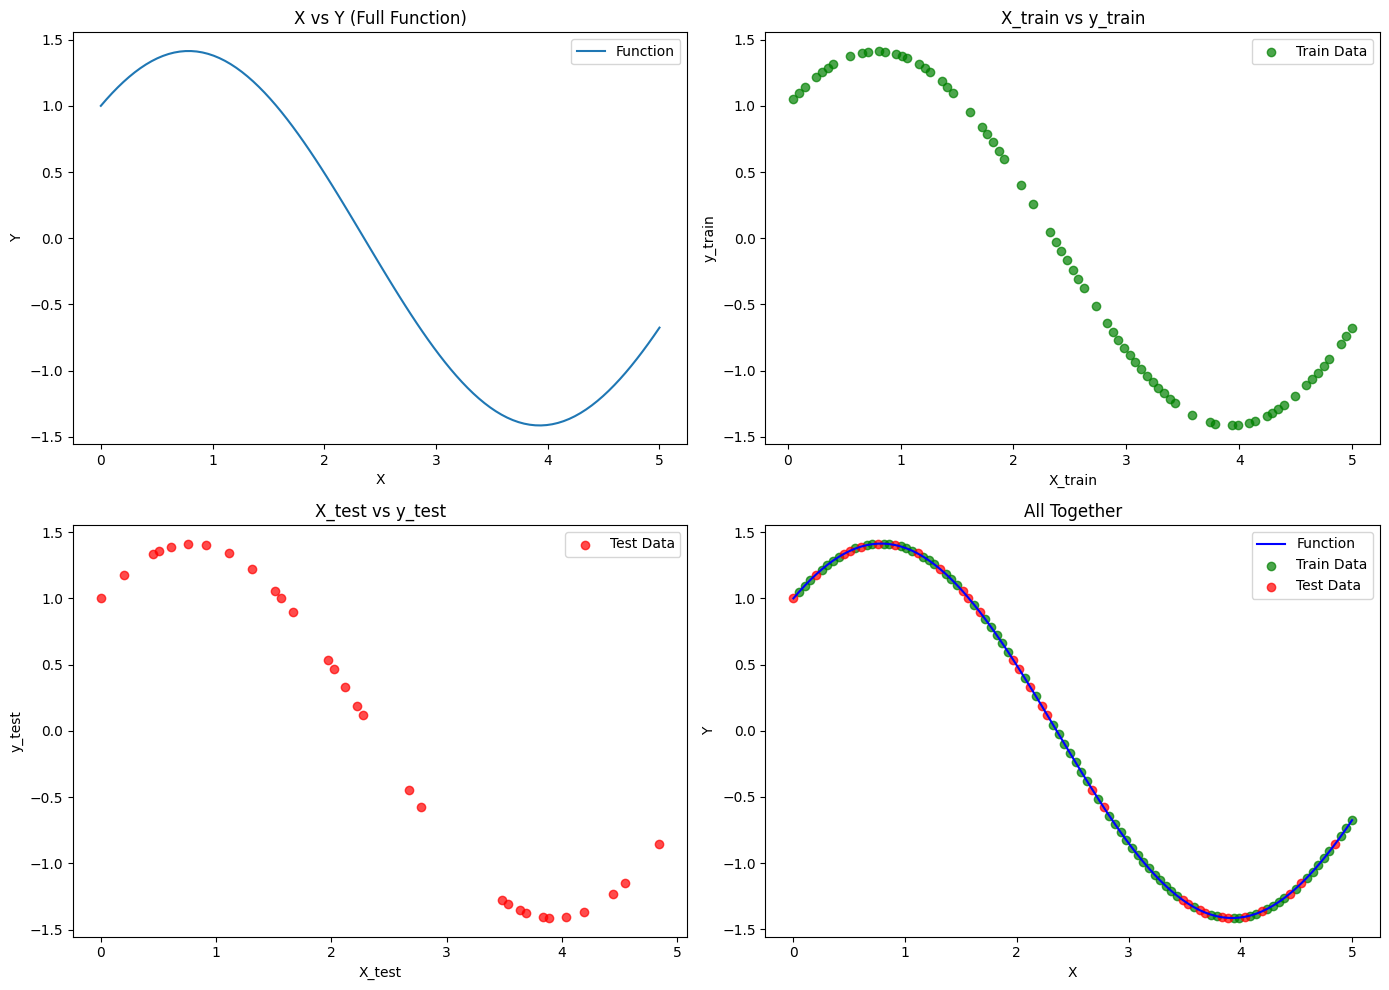

In [25]:
plot_data(X, y, X_train, X_test, y_train, y_test)

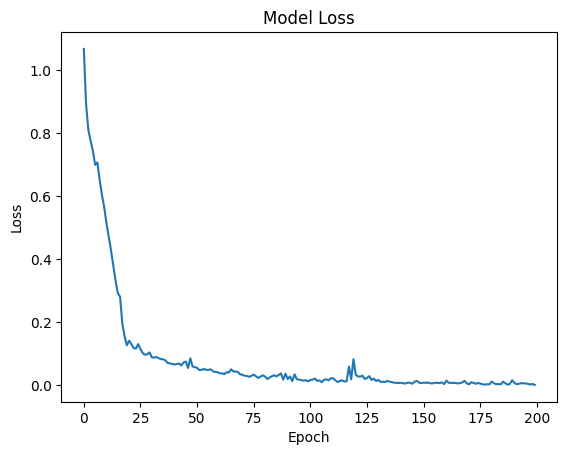

In [26]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train.reshape(-1, 1), y_train, epochs=200, verbose=0)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


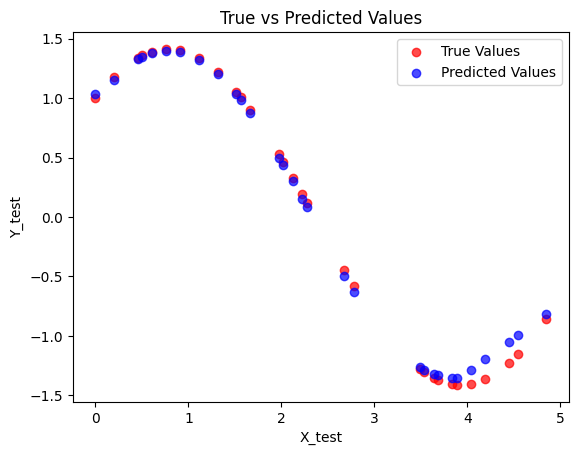

In [27]:
predicted_y = model.predict(X_test.reshape(-1, 1))

plt.scatter(X_test, y_test, color='red', label='True Values', alpha=0.7)
plt.scatter(X_test, predicted_y, color='blue', label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Values')
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.legend()
plt.show()

# b. $f(x) = 10x^5 + 5x^4 + 2x^3 - 0{,}5x^2 + 3x + 2$, onde $0 \leq x \leq 5$

In [14]:
def functionb(x):
    return 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2

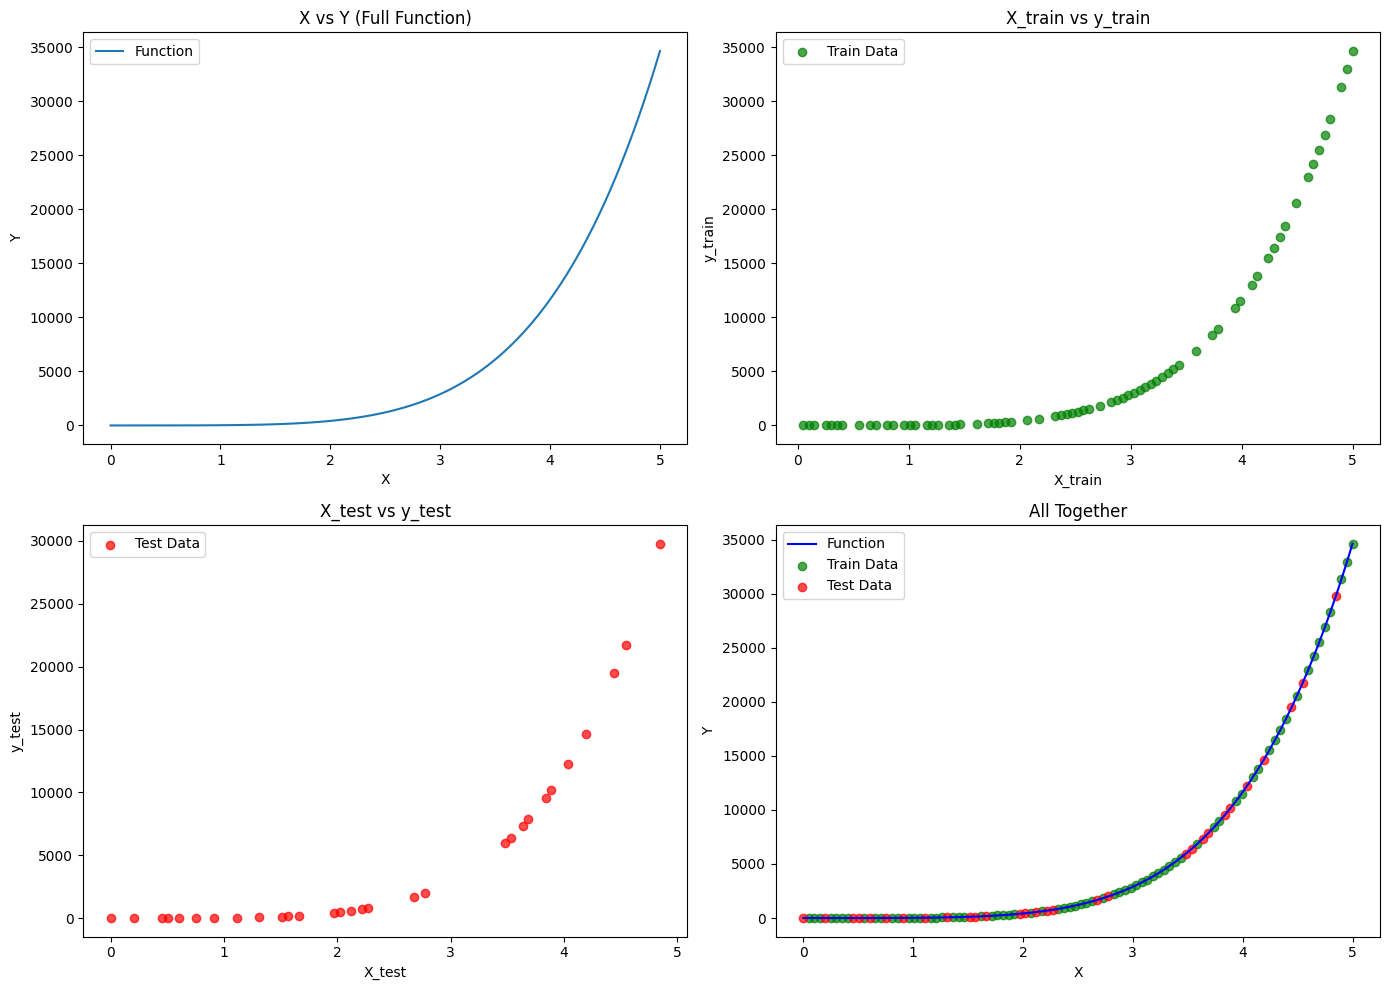

In [15]:
X, y, X_train, X_test, y_train, y_test = create_train_test_sets(functionb, 0, 5, 100, 0.3)
plot_data(X, y, X_train, X_test, y_train, y_test)

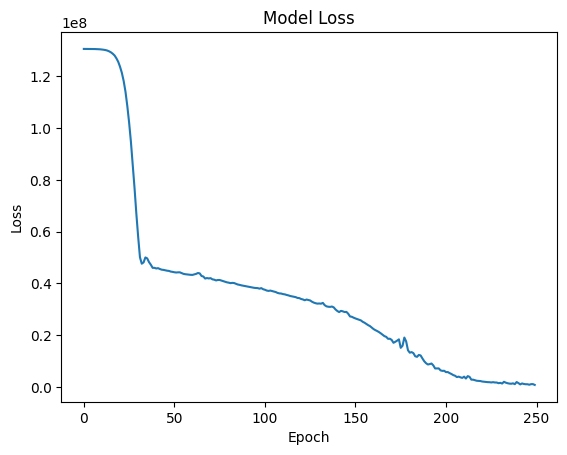

In [16]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train.reshape(-1, 1), y_train, epochs=250, verbose=False)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


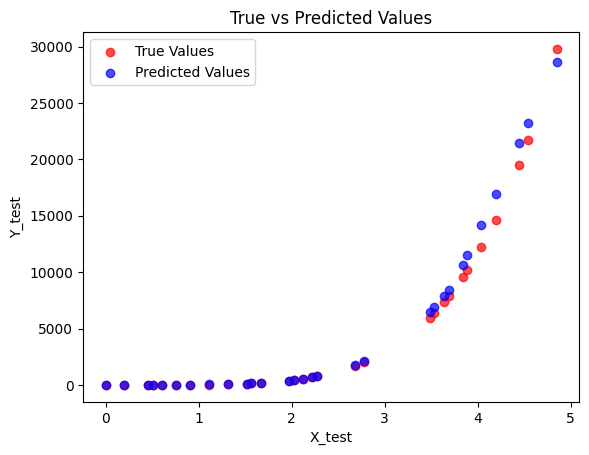

In [17]:
predicted_y = model.predict(X_test.reshape(-1, 1))

plt.scatter(X_test, y_test, color='red', label='True Values', alpha=0.7)
plt.scatter(X_test, predicted_y, color='blue', label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Values')
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.legend()
plt.show()